Ziel: Ich will die Bista-Daten zu den an den Schulen im Kanton Zürich gesprochenen Erstsprachen seit 2000 herunterladen, die Files verknüpfen (18 Dateien mit fast 80 000 Zeilen), nach den Gemeinden am Zürichsee filtern, sortieren und dann analysieren. Welche Sprachen haben besonders zugenommen, welche abgenommen? Was sind die Auffälligkeiten, wo gibt es Unterschiede? These: Durch die Personenfreizügigkeit (PFZ) nimmt der Anteil der Kinder aus den "traditionellen" Einwanderungsländern (Italien, Balkan) ab, jene aus den westlichen EU-Staaten hingegen zu.

In [1]:
import pandas as pd
import numpy as np
import re
import glob
%matplotlib inline

In [2]:
#zuerst der test mit einem der 18 files
path = "Erstsprache/Dateien/"

In [3]:
#Sämtliche Files mit Glob auswählen
filenames = glob.glob(path + "Sprachen/*.xls")

In [4]:
#zahl der files testen
len(filenames)

19

In [5]:
filenames[0:2]

['Erstsprache/Dateien/Sprachen/Erstsprache 2018.xls',
 'Erstsprache/Dateien/Sprachen/Erstsprache 2009.xls']

In [6]:
dfs = []

In [7]:
#Einlesen mit list comprehension ("Blätter stapeln"), erste vier Zeilen skippen
dfs = [pd.read_excel(filename, skiprows=[0,1,2,3]) for filename in filenames]

In [8]:
#test, resp. durch die einzelnen dataframes gehen
dfs[4].head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
0,2006,Adlikon (Primar),Deutsch,0.0,12.0,0.0,NaN,NaN,NaN,NaN,12
1,2006,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
2,2006,Adliswil (Einheitsgemeinde),Albanisch,20.0,55.0,12.0,6.0,24.0,8.0,3.0,128
3,2006,Adliswil (Einheitsgemeinde),Arabisch,0.0,3.0,1.0,1.0,1.0,0.0,0.0,6
4,2006,Adliswil (Einheitsgemeinde),Bosnisch,2.0,10.0,2.0,0.0,1.0,0.0,0.0,15


In [9]:
#Nun alle 19 Dateien zu einem Datenframe zusammenhängen
df_all = pd.concat(dfs, ignore_index=True)

In [10]:
df_all.shape

(79527, 11)

In [11]:
df_all.head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
0,2018,Adlikon (Primar),Deutsch,0.0,13.0,0.0,NaN,NaN,NaN,NaN,13
1,2018,Adlikon (Primar),Kurdisch,0.0,1.0,0.0,NaN,NaN,NaN,NaN,1
2,2018,Adliswil (Einheitsgemeinde),Albanisch,35.0,69.0,2.0,17.0,17.0,8.0,0.0,148
3,2018,Adliswil (Einheitsgemeinde),Arabisch,6.0,11.0,0.0,0.0,1.0,0.0,0.0,18
4,2018,Adliswil (Einheitsgemeinde),Bosnisch,5.0,6.0,0.0,3.0,1.0,0.0,0.0,15


In [12]:
df_all.dtypes

Jahr               int64
Schulgemeinde     object
Erstsprache       object
KG               float64
PS               float64
PS Sonder        float64
Sek A            float64
Sek B            float64
Sek C            float64
Sek Sonder       float64
Total              int64
dtype: object

In [13]:
#wie heissen die Schulgemeinden?
df_all["Schulgemeinde"].unique()

array(['Adlikon (Primar)', 'Adliswil (Einheitsgemeinde)',
       'Aesch (Primar)', 'Aeugst a.A. (Primar)',
       'Affoltern a.A. (Primar)', 'Affoltern a.A.-Aeugst (Sekundar)',
       'Altikon (Primar + Pol. Gem.)', 'Andelfingen (Primar)',
       'Andelfingen (Sekundar)', 'Bachenbülach (Primar)',
       'Bachs (Primar)', 'Bäretswil (Einheitsgemeinde)',
       'Bassersdorf (Einheitsgemeinde)',
       'Bauma-Sternenberg (Einheitsgemeinde)', 'Benken (Primar)',
       'Birmensdorf (Primar)', 'Birmensdorf-Aesch (Sekundar)',
       'Bonstetten (Primar + Pol. Gem.)', 'Bonstetten (Sekundar)',
       'Boppelsen (Primar)', 'Brütten (Einheitsgemeinde)',
       'Bubikon (Einheitsgemeinde)', 'Buchs (Primar + Pol. Gem.)',
       'Bülach (Primar + Pol. Gem.)', 'Bülach (Sekundar)',
       'Dachsen (Primar)', 'Dägerlen (Primar)',
       'Dällikon (Primar + Pol. Gem.)', 'Dänikon-Hüttikon (Primar)',
       'Dättlikon (Einheitsgemeinde)', 'Dielsdorf (Primar)',
       'Dielsdorf (Sekundar)', 'Dietikon (Ein

In [14]:
#welche Sprachen gibt es?
df_all["Erstsprache"].unique()

array(['Deutsch', 'Kurdisch', 'Albanisch', 'Arabisch', 'Bosnisch',
       'Bulgarisch', 'Chinesisch', 'Dänisch', 'Englisch', 'Finnisch',
       'Französisch', 'Griechisch', 'Iranische Sprachen', 'Italienisch',
       'Koreanisch', 'Kroatisch', 'Mazedonisch', 'Niederländisch',
       'Polnisch', 'Portugiesisch', 'Rumänisch', 'Russisch', 'Schwedisch',
       'Serbisch', 'Slowakisch', 'Slowenisch', 'Spanische Sprachen',
       'Tamil', 'Thai', 'Tschechisch', 'Türkisch',
       'Übrige afrikanische Sprachen', 'Übrige ostasiatische Sprachen',
       'Übrige osteuropäische Sprachen', 'Übrige Sprachen',
       'Übrige westasiatische Sprachen', 'Ungarisch', 'Norwegisch',
       'Übrige indoari. und drawid.Spr', 'Somali',
       'Übrige slawische Sprachen', 'Übrige nordeurop. Sprachen',
       'Übrige europäische Sprachen', 'Rätoromanisch', 'Isländisch',
       'Nicht erhoben (nur tertiär)', 'Übrige westeurop. Sprachen',
       'Afrikanische Sprachen', 'Andere asiatische Sprachen',
       'Süds

In [15]:
#welche Jahre?
df_all["Jahr"].unique()

array([2018, 2009, 2008, 2012, 2006, 2007, 2013, 2005, 2011, 2010, 2004,
       2000, 2014, 2015, 2001, 2017, 2003, 2002, 2016])

In [16]:
# Listen mit Schulgemeinden nach Bezirken
seegemeinden = ["Adliswil (Einheitsgemeinde)",
             "Erlenbach (Einheitsgemeinde)",
             "Herrliberg (Einheitsgemeinde)",
             "Hirzel (Einheitsgemeinde)",
             "Hombrechtikon (Einheitsgemeinde)",
             "Horgen (Einheitsgemeinde)",
             "Hütten (Primar)",
             "Kilchberg (Einheitsgemeinde)",
             "Küsnacht (Primar + Sekundar)",
             "Langnau a.A. (Einheitsgemeinde)",
             "Männedorf (Einheitsgemeinde)",
             "Meilen (Einheitsgemeinde)",
             "Oberrieden (Einheitsgemeinde)",
             "Oetwil a.S. (Einheitsgemeinde)",
             "Richterswil (Einheitsgemeinde)",
             "Rüschlikon (Einheitsgemeinde)",
             "Schönenberg (Primar + Pol. Gem.)",
             "Stäfa (Primar + Sekundar)",
             "Thalwil (Einheitsgemeinde)",
             "Uetikon a.S. (Einheitsgemeinde)",
             "Wädenswil (Primar + Pol. Gem.)",
             "Wädenswil (Sekundar)",
             "Zollikon (Einheitsgemeinde)",
             "Zumikon (Primar + Sekundar)",
             "Erlenbach-Herrliberg (Sek.schul Verband)",
             "Hütten (Primar + Pol. Gem.)",
             "Kilchberg-Rüschlikon (Sek.schul Verband)",
             "Stäfa (Einheitsgemeinde)",
             "Zumikon (Einheitsgemeinde)"]
stadtzürich = ['Zürich-Glattal (Kreisschulpflege)',
               'Zürich-Letzi (Kreisschulpflege)',
               'Zürich-Limmattal (Kreisschulpflege)',
               'Zürich-Schwamendingen (Kreisschulpflege)',
               'Zürich-Uto (Kreisschulpflege)',
               'Zürich-Waidberg (Kreisschulpflege)',
               'Zürich-Zürichberg (Kreisschulpflege)']
stadtwinti = ['Winterthur-Mattenbach (Kreisschulpflege)',
                   'Winterthur-Oberwinterthur (Kreisschulpflege)',
                   'Winterthur-Seen (Kreisschulpflege)',
                   'Winterthur-Stadt (Kreisschulpflege)',
                   'Winterthur-Töss (Kreisschulpflege)',
                   'Winterthur-Veltheim (Kreisschulpflege)',
                   'Winterthur-Wülflingen (Kreisschulpflege)',
                   'Winterthur Seen-Mattenbach (Kreisschulpflege)',
                   'Winterthur Stadt-Töss (Kreisschulpflege)',
                   'Winterthur Veltheim-Wülflingen (Kreisschulpflege)']
gemeinbuelach = ['Bachenbülach (Primar)',
                    'Bassersdorf (Einheitsgemeinde)',
                    'Bülach (Primar + Pol. Gem.)',
                    'Bülach (Sekundar)',
                    'Dietlikon (Primar + Sekundar)',
                 'Eglisau (Primar + Sekundar)',
                 'Embrach (Primar + Pol. Gem.)',
                 'Embrach (Sekundar)',
                 'Glattfelden (Primar + Sekundar)',
                 'Glattfelden (Einheitsgemeinde)',
                 'Hochfelden (Primar)',
                 'Höri (Primar)',
                 'Hüntwangen (Primar)',
                 'Kloten (Einheitsgemeinde)',
                 'Lufingen (Primar + Pol. Gem.)',
                 'Nürensdorf (Einheitsgemeinde)',
                 'Oberembrach (Primar)',
                 'Opfikon (Einheitsgemeinde)',
                 'Rafz (Einheitsgemeinde)',
                 'Unteres Rafzerfeld (Primar + Sekundar)',
                 'Rorbas-Freienstein-Teufen (Primar + Sekundar)',
                 'Wallisellen (Primar + Sekundar)',
                 'Wasterkingen (Primar)',
                 'Wil (Primar)',
                 'Wil (Sekundar)',
                 'Winkel (Primar)',]
gemeindielsdorf = ['Bachs (Primar)',
                      'Boppelsen (Primar)',
                      'Buchs (Primar)',
                   'Buchs (Primar + Pol. Gem.)',
                   'Dällikon (Primar + Pol. Gem.)',
                      'Dänikon-Hüttikon (Primar)',
                      'Dielsdorf (Primar)',
                      'Dielsdorf (Sekundar)',
                   'Unteres Furttal (Sekundar)',
                   'Neerach (Primar)',
                   'Niederglatt (Primar)',
                   'Niederhasli (Primar + Pol. Gem.)',
                   'Niederhasli-Niederglatt (Sekundar)',
                   'Niederweningen (Primar + Pol. Gem.)',
                   'Niederweningen (Sekundar)',
                   'Oberglatt (Primar)',
                   'Oberglatt (Primar + Pol. Gem.)',
                   'Otelfingen (Primar + Pol. Gem.)',
                   'Otelfingen (Sekundar)',
                   'Regensberg (Primar)',
                   'Regensdorf (Primar)',
                   'Regensdorf-Buchs-Dällikon (Sekundar)',
                   'Rümlang (Primar)',
                   'Rümlang-Oberglatt (Sekundar)',
                   'Schleinikon (Primar)',
                   'Schöfflisdorf-Oberweningen (Primar)',
                   'Stadel (Primar)',
                   'Stadel (Sekundar)',
                   'Steinmaur (Primar)',
                   'Weiach (Primar)',
                   'Wehntal (Primar + Sekundar)',]
gemeinpfaeffikon = ['Bauma (Einheitsgemeinde)',
                    'Bauma-Sternenberg (Einheitsgemeinde)',
                    'Fehraltorf (Einheitsgemeinde)',
                    'Hittnau (Primar + Sekundar)',
                    'Illnau-Effretikon (Einheitsgemeinde)',
                    'Kyburg (Einheitsgemeinde)',
                    'Lindau (Einheitsgemeinde)',
                    'Pfäffikon (Einheitsgemeinde)',
                    'Pfäffikon (Primar)',
                    'Pfäffikon (Sekundar)',
                    'Russikon (Einheitsgemeinde)',
                    'Sternenberg (Primar + Sekundar)',
                    'Weisslingen (Primar)',
                    'Weisslingen (Sekundar)',
                    'Weisslingen (Einheitsgemeinde)',
                    'Wila (Primar)',
                    'Wila (Sekundar)',
                    'Wildberg (Primar)',]
gemeinaffoltern = ['Aeugst a.A. (Primar)',
                      'Affoltern a.A. (Primar)',
                      'Affoltern a.A.-Aeugst (Sekundar)',
                      'Bonstetten (Primar)',
                      'Bonstetten (Sekundar)',
                   'Bonstetten (Primar + Pol. Gem.)',
                   'Hausen a.A. (Primar + Pol. Gem.)',
                   'Hausen a.A. (Sekundar)',
                   'Hedingen (Einheitsgemeinde)',
                   'Kappel a.A. (Primar + Pol. Gem.)',
                   'Knonau (Primar)',
                   'Knonau (Primar + Pol. Gem.)',
                   'Maschwanden (Primar)',
                   'Mettmenstetten (Primar)',
                   'Mettmenstetten (Sekundar)',
                   'Obfelden (Primar)',
                   'Obfelden-Ottenbach (Sekundar)',
                   'Ossingen (Primar)',
                   'Ossingen (Sekundar)',
                   'Ottenbach (Primar)',
                   'Rifferswil (Primar + Pol. Gem.)',
                   'Schulzweckverband Affoltern a.A. (Zweckverband)',
                   'Stallikon (Primar + Pol. Gem.)',
                   'Wettswil a.A. (Primar)',]
gemeinuster = ['Dübendorf (Primar + Pol. Gem.)',
               'Dübendorf-Schwerzenbach (Sekundar)',
               'Egg (Primar + Sekundar)',
               'Egg (Einheitsgemeinde)',
               'Fällanden (Primar + Sekundar)',
               'Greifensee (Primar + Pol. Gem.)',
               'Maur (Einheitsgemeinde)',
               'Mönchaltorf (Einheitsgemeinde)',
               'Nänikon-Greifensee (Sekundar)',
               'Schwerzenbach (Primar)',
               'Uster (Primar + Pol. Gem.)',
               'Uster (Sekundar)',
               'Volketswil (Primar + Sekundar)',
               'Wangen-Brüttisellen (Einheitsgemeinde)',]
gemeinhinwil = ['Bäretswil (Einheitsgemeinde)',
                'Bäretswil (Primar)',
                'Bäretswil (Sekundar)',
                   'Bertschikon (Primar + Pol. Gem.)',
                   'Bubikon (Primar + Sekundar)',
                'Dürnten (Einheitsgemeinde)',
                'Dürnten (Primar)',
                'Dürnten (Sekundar)',
                'Fischenthal (Primar + Sekundar)',
                'Fischenthal (Einheitsgemeinde)',
                'Gossau (Primar)',
                'Gossau (Sekundar)',
                'Gossau (Primar + Sekundar)',
                'Grüningen (Primar + Sekundar)',
                'Hinwil (Primar)',
                'Hinwil (Sekundar)',
                'Hinwil (Primar + Sekundar)',
                'Rüti (Primar)',
                'Rüti (Sekundar)',
                'Rüti (Primar + Sekundar)',
                'Seegräben (Primar + Pol. Gem.)',
                'Wald (Primar)',
                'Wald (Sekundar)',
                'Wald (Einheitsgemeinde)',
                'Wetzikon (Primar)',
                'Wetzikon-Seegräben (Sekundar)',
                'Wetzikon (Primar + Pol. Gem.)',]
gemeinandelf = ['Adlikon (Primar)',
                   'Andelfingen (Primar)',
                   'Andelfingen (Sekundar)',
                   'Benken (Primar)',
                   'Berg a.I. (Primar)',
                   'Buch a.I. (Primar)',
                   'Dachsen (Primar)',
                'Dorf (Primar)',
                'Feuerthalen (Primar + Sekundar)',
                'Feuerthalen (Einheitsgemeinde)',
                'Flaach (Primar)',
                'Flaachtal (Sekundar)',
                'Flaachtal (Primar + Sekundar)',
                'Flurlingen (Primar)',
                'Henggart (Primar + Pol. Gem.)',
                'Humlikon (Primar)',
                'Kleinandelfingen (Primar)',
                'Laufen-Uhwiesen (Primar)',
                'Marthalen (Primar)',
                'Marthalen (Sekundar)',
                'Oberstammheim (Primar)',
                'Rheinau (Primar + Pol. Gem.)',
                'Stammheim (Sekundar)',
                'Stammertal (Primar + Sekundar)',
                'Thalheim a.d.Th. (Primar + Pol. Gem.)',
                'Trüllikon (Primar)',
                'Truttikon (Primar)',
                'Uhwiesen (Sekundar)',
                'Unterstammheim (Primar)',
                'Volken (Primar)',
                'Waltalingen (Primar)',]
gemeinwintiland = ['Altikon (Primar + Pol. Gem.)',
                      'Brütten (Einheitsgemeinde)',
                      'Dägerlen (Primar)',
                      'Dättlikon (Einheitsgemeinde)',
                      'Dinhard (Primar + Pol. Gem.)',
                   'Elgg (Primar)',
                   'Elgg (Sekundar)',
                   'Ellikon a.d.Th. (Primar)',
                   'Elsau (Primar)',
                   'Elsau-Schlatt (Sekundar)',
                   'Hagenbuch (Primar + Pol. Gem.)',
                   'Hettlingen (Primar)',
                   'Hettlingen (Primar + Pol. Gem.)',
                   'Hofstetten (Primar)',
                   'Neftenbach (Einheitsgemeinde)',
                   'Pfungen (Einheitsgemeinde)',
                   'Rickenbach (Primar)',
                   'Rickenbach (Sekundar)',
                   'Rickenbach (Primar + Pol. Gem.)',
                   'Schlatt (Primar)',
                   'Seuzach (Primar + Pol. Gem.)',
                   'Seuzach (Sekundar)',
                   'Turbenthal (Primar)',
                   'Turbenthal-Wildberg (Sekundar)',
                   'Wiesendangen (Primar + Sekundar)',
                   'Wiesendangen-Bertschikon (Primar + Sekundar)',
                   'Zell (Einheitsgemeinde)',]
gemeindietikon = ['Aesch (Primar)',
                     'Birmensdorf (Primar)',
                     'Birmensdorf-Aesch (Sekundar)',
                     'Dietikon (Einheitsgemeinde)',
                  'Oberengstringen (Einheitsgemeinde)',
                  'Oetwil-Geroldswil (Primar)',
                  'Schlieren (Einheitsgemeinde)',
                  'Uitikon (Primar + Sekundar)',
                  'Unterengstringen (Primar)',
                  'Urdorf (Primar + Sekundar)',
                  'Weiningen (Primar + Pol. Gem.)',
                  'Weiningen (Sekundar)',]

In [17]:
# neues Dataframe schaffen nur mit "meinen" Gemeinden
df_all[df_all["Schulgemeinde"].isin(seegemeinden)]

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
2,2018,Adliswil (Einheitsgemeinde),Albanisch,35.0,69.0,2.0,17.0,17.0,8.0,0.0,148
3,2018,Adliswil (Einheitsgemeinde),Arabisch,6.0,11.0,0.0,0.0,1.0,0.0,0.0,18
4,2018,Adliswil (Einheitsgemeinde),Bosnisch,5.0,6.0,0.0,3.0,1.0,0.0,0.0,15
5,2018,Adliswil (Einheitsgemeinde),Bulgarisch,1.0,1.0,0.0,0.0,2.0,0.0,0.0,4
6,2018,Adliswil (Einheitsgemeinde),Chinesisch,1.0,4.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
79235,2016,Zumikon (Einheitsgemeinde),Türkisch,1.0,2.0,0.0,NaN,NaN,NaN,NaN,3
79236,2016,Zumikon (Einheitsgemeinde),Übrige indoari. und drawid.Spr,0.0,1.0,0.0,NaN,NaN,NaN,NaN,1
79237,2016,Zumikon (Einheitsgemeinde),Übrige slawische Sprachen,0.0,2.0,0.0,NaN,NaN,NaN,NaN,2
79238,2016,Zumikon (Einheitsgemeinde),Übrige Sprachen,1.0,7.0,0.0,NaN,NaN,NaN,NaN,8


In [18]:
df_all[df_all["Schulgemeinde"].isin(gemeindietikon)]

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
39,2018,Aesch (Primar),Deutsch,29.0,75.0,0.0,NaN,NaN,NaN,NaN,104
40,2018,Aesch (Primar),Französisch,1.0,3.0,0.0,NaN,NaN,NaN,NaN,4
41,2018,Aesch (Primar),Italienisch,1.0,1.0,0.0,NaN,NaN,NaN,NaN,2
42,2018,Aesch (Primar),Kroatisch,1.0,0.0,0.0,NaN,NaN,NaN,NaN,1
43,2018,Aesch (Primar),Niederländisch,0.0,1.0,0.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
78809,2016,Weiningen (Sekundar),Übrige afrikanische Sprachen,NaN,NaN,NaN,0.0,2.0,1.0,0.0,3
78810,2016,Weiningen (Sekundar),Übrige indoari. und drawid.Spr,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1
78811,2016,Weiningen (Sekundar),Übrige ostasiatische Sprachen,NaN,NaN,NaN,0.0,2.0,0.0,0.0,2
78812,2016,Weiningen (Sekundar),Übrige Sprachen,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1


In [19]:
df_all[df_all['Schulgemeinde'].isin(stadtzürich)]

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
4242,2018,Zürich-Glattal (Kreisschulpflege),Albanisch,121.0,315.0,1.0,65.0,78.0,0.0,0.0,580
4243,2018,Zürich-Glattal (Kreisschulpflege),Arabisch,71.0,103.0,11.0,32.0,36.0,0.0,5.0,258
4244,2018,Zürich-Glattal (Kreisschulpflege),Bosnisch,23.0,40.0,0.0,16.0,10.0,0.0,0.0,89
4245,2018,Zürich-Glattal (Kreisschulpflege),Bulgarisch,3.0,8.0,0.0,1.0,0.0,0.0,0.0,12
4246,2018,Zürich-Glattal (Kreisschulpflege),Chinesisch,16.0,26.0,1.0,5.0,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...,...
79522,2016,Zürich-Zürichberg (Kreisschulpflege),Übrige osteuropäische Sprachen,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3
79523,2016,Zürich-Zürichberg (Kreisschulpflege),Übrige slawische Sprachen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
79524,2016,Zürich-Zürichberg (Kreisschulpflege),Übrige Sprachen,1.0,12.0,0.0,1.0,3.0,0.0,1.0,18
79525,2016,Zürich-Zürichberg (Kreisschulpflege),Übrige westasiatische Sprachen,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [20]:
# das neue Dataframe für die weitere Verarbeitung definieren
df_zuerichsee = df_all[df_all["Schulgemeinde"].isin(seegemeinden)]
df_dietikon = df_all[df_all["Schulgemeinde"].isin(gemeindietikon)]
df_stadtzürich = df_all[df_all['Schulgemeinde'].isin(stadtzürich)]

In [21]:
#test
df_zuerichsee.head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
2,2018,Adliswil (Einheitsgemeinde),Albanisch,35.0,69.0,2.0,17.0,17.0,8.0,0.0,148
3,2018,Adliswil (Einheitsgemeinde),Arabisch,6.0,11.0,0.0,0.0,1.0,0.0,0.0,18
4,2018,Adliswil (Einheitsgemeinde),Bosnisch,5.0,6.0,0.0,3.0,1.0,0.0,0.0,15
5,2018,Adliswil (Einheitsgemeinde),Bulgarisch,1.0,1.0,0.0,0.0,2.0,0.0,0.0,4
6,2018,Adliswil (Einheitsgemeinde),Chinesisch,1.0,4.0,0.0,0.0,0.0,0.0,0.0,5


In [22]:
#sortierung testen
df_zuerichsee.sort_values('Total', ascending=False).head(5)

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
61886,2001,Wädenswil (Primar + Pol. Gem.),Deutsch,304.0,849.0,48.0,NaN,NaN,NaN,NaN,1201
74048,2002,Wädenswil (Primar + Pol. Gem.),Deutsch,294.0,866.0,40.0,NaN,NaN,NaN,NaN,1200
49623,2000,Wädenswil (Primar + Pol. Gem.),Deutsch,276.0,846.0,44.0,NaN,NaN,NaN,NaN,1166
70315,2003,Wädenswil (Primar + Pol. Gem.),Deutsch,265.0,847.0,52.0,NaN,NaN,NaN,NaN,1164
69594,2003,Richterswil (Einheitsgemeinde),Deutsch,196.0,658.0,12.0,155.0,114.0,12.0,0.0,1147


In [23]:
#Den Index auf Jahre setzen
df_zuerichsee.set_index('Jahr', inplace=True)
df_dietikon.set_index('Jahr', inplace=True)
df_stadtzürich.set_index('Jahr',inplace=True)

In [24]:
#test
df_zuerichsee
df_dietikon
df_stadtzürich

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2018,Zürich-Glattal (Kreisschulpflege),Albanisch,121.0,315.0,1.0,65.0,78.0,0.0,0.0,580
2018,Zürich-Glattal (Kreisschulpflege),Arabisch,71.0,103.0,11.0,32.0,36.0,0.0,5.0,258
2018,Zürich-Glattal (Kreisschulpflege),Bosnisch,23.0,40.0,0.0,16.0,10.0,0.0,0.0,89
2018,Zürich-Glattal (Kreisschulpflege),Bulgarisch,3.0,8.0,0.0,1.0,0.0,0.0,0.0,12
2018,Zürich-Glattal (Kreisschulpflege),Chinesisch,16.0,26.0,1.0,5.0,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...
2016,Zürich-Zürichberg (Kreisschulpflege),Übrige osteuropäische Sprachen,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3
2016,Zürich-Zürichberg (Kreisschulpflege),Übrige slawische Sprachen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
2016,Zürich-Zürichberg (Kreisschulpflege),Übrige Sprachen,1.0,12.0,0.0,1.0,3.0,0.0,1.0,18


In [25]:
#eine Sprache auswählen, in diesem Fall Albanisch
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch']
df_dietikon[df_dietikon['Erstsprache'] == 'Albanisch']
df_stadtzürich[df_stadtzürich['Erstsprache'] == 'Albanisch']

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2018,Zürich-Glattal (Kreisschulpflege),Albanisch,121.0,315.0,1.0,65.0,78.0,0.0,0.0,580
2018,Zürich-Letzi (Kreisschulpflege),Albanisch,60.0,200.0,0.0,49.0,46.0,0.0,0.0,355
2018,Zürich-Limmattal (Kreisschulpflege),Albanisch,44.0,173.0,0.0,39.0,53.0,0.0,0.0,309
2018,Zürich-Schwamendingen (Kreisschulpflege),Albanisch,84.0,191.0,0.0,46.0,56.0,0.0,0.0,377
2018,Zürich-Uto (Kreisschulpflege),Albanisch,37.0,128.0,0.0,22.0,33.0,0.0,0.0,220
...,...,...,...,...,...,...,...,...,...,...
2016,Zürich-Limmattal (Kreisschulpflege),Albanisch,60.0,183.0,0.0,31.0,53.0,0.0,2.0,329
2016,Zürich-Schwamendingen (Kreisschulpflege),Albanisch,71.0,221.0,0.0,40.0,65.0,0.0,0.0,397
2016,Zürich-Uto (Kreisschulpflege),Albanisch,40.0,116.0,0.0,21.0,62.0,0.0,0.0,239


In [26]:
#Die Daten neu anordnen, damit ich die Jahresverläufe plotten kann
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')
df_dietikon[df_dietikon['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')
df_stadtzürich[df_stadtzürich['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')

Schulgemeinde,Zürich-Glattal (Kreisschulpflege),Zürich-Letzi (Kreisschulpflege),Zürich-Limmattal (Kreisschulpflege),Zürich-Schwamendingen (Kreisschulpflege),Zürich-Uto (Kreisschulpflege),Zürich-Waidberg (Kreisschulpflege),Zürich-Zürichberg (Kreisschulpflege)
Jahr,,,,,,,
2000,425,288,678,204,248,154,74
2001,426,291,655,229,263,158,66
2002,432,298,640,260,272,173,65
2003,447,300,628,301,303,169,59
2004,468,314,574,335,332,176,56
2005,495,333,557,369,324,169,53
2006,515,337,539,376,325,164,47
2007,532,346,500,400,317,160,46
2008,551,341,477,411,291,168,45


In [27]:
# ein neues dataframe mit albanisch
df_albanisch_see = df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                                      columns='Schulgemeinde', 
                                                                                      values='Total')
df_alban_dietikon = df_dietikon[df_dietikon['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                                      columns='Schulgemeinde', 
                                                                                      values='Total')
df_alban_stadtzüri = df_stadtzürich[df_stadtzürich['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')

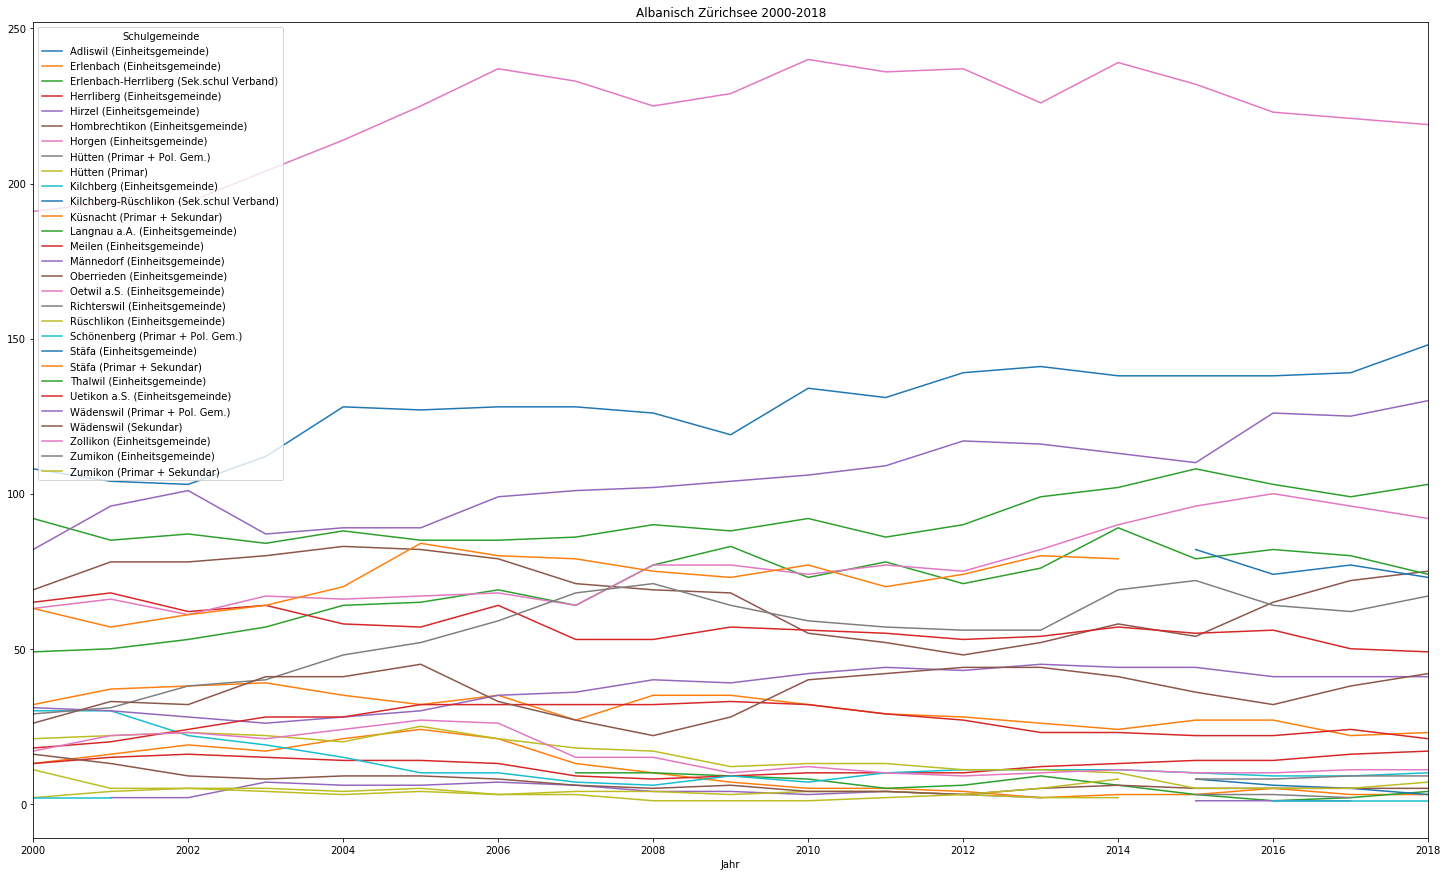

In [28]:
#plotten....
df_albanisch_see.plot(figsize=(25,15), title="Albanisch Zürichsee 2000-2018")

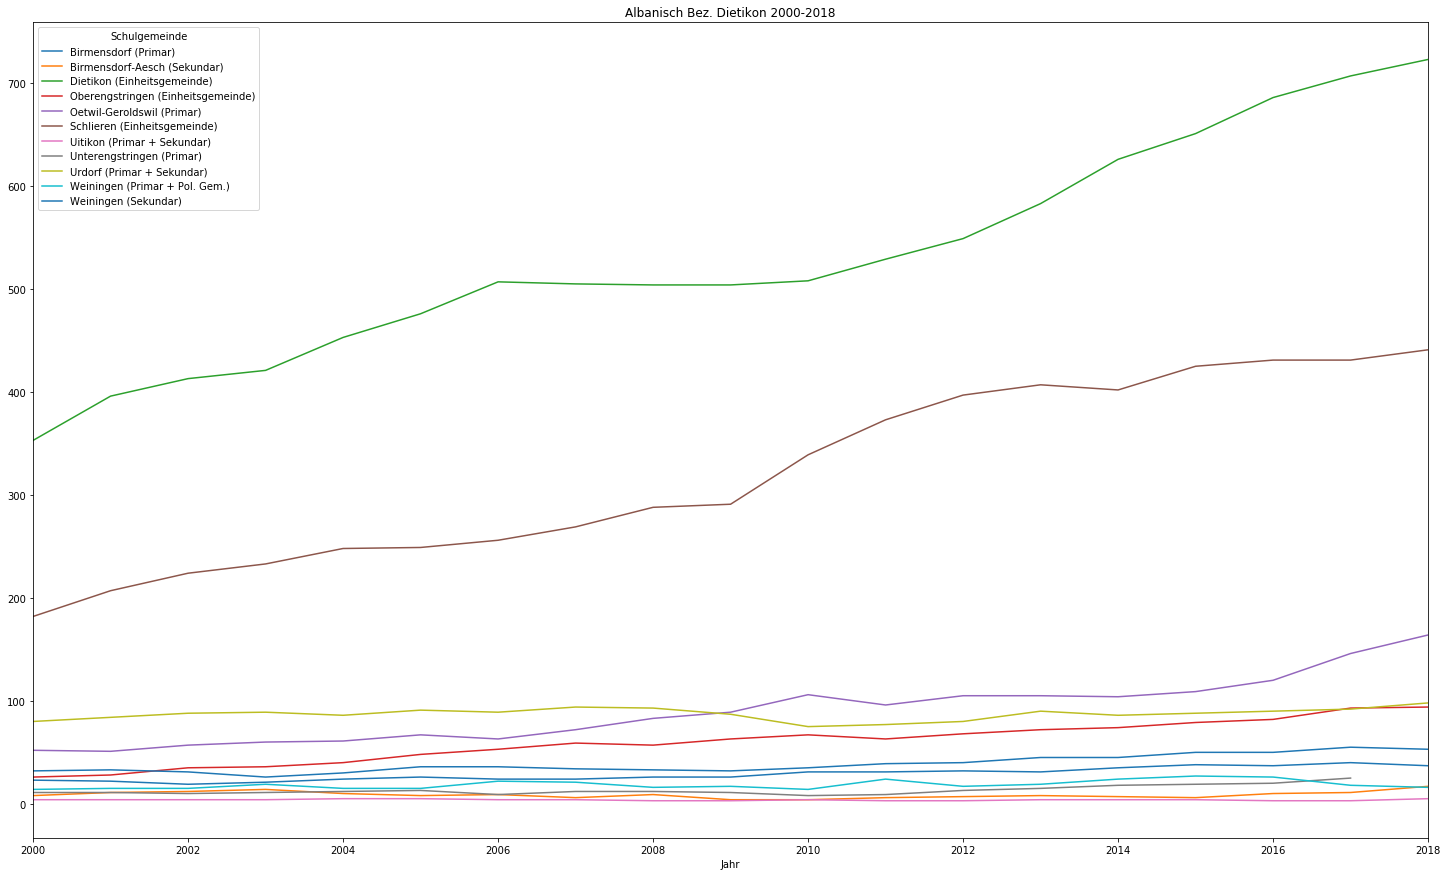

In [29]:
df_alban_dietikon.plot(figsize=(25,15), title="Albanisch Bez. Dietikon 2000-2018")

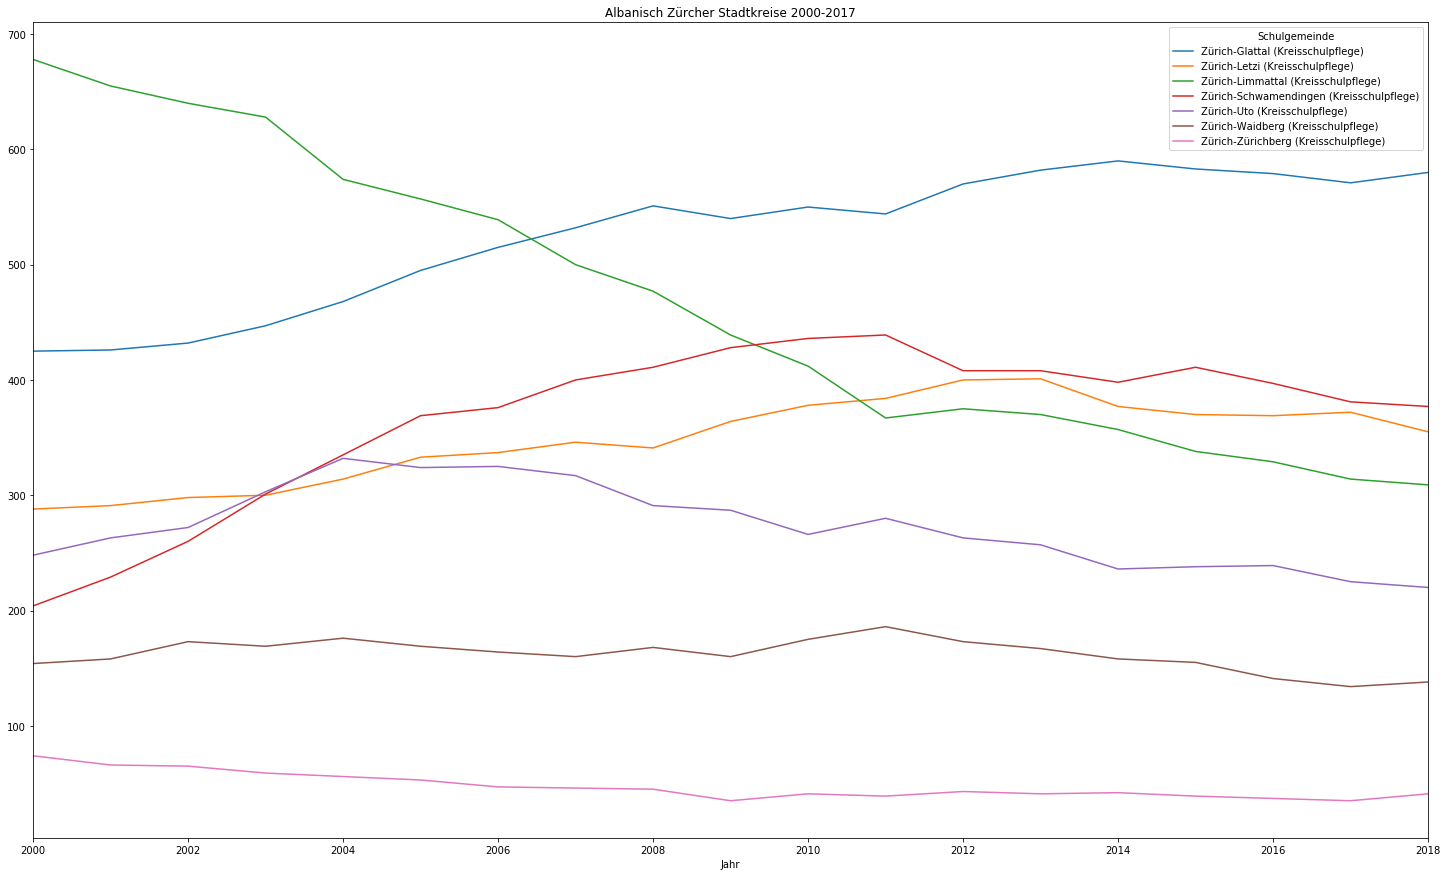

In [30]:
df_alban_stadtzüri.plot(figsize=(25,15), title="Albanisch Zürcher Stadtkreise 2000-2017")

In [31]:
#wie sieht es auf Kindergartenstufe aus?
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='KG')

Schulgemeinde,Adliswil (Einheitsgemeinde),Erlenbach (Einheitsgemeinde),Herrliberg (Einheitsgemeinde),Hirzel (Einheitsgemeinde),Hombrechtikon (Einheitsgemeinde),Horgen (Einheitsgemeinde),Hütten (Primar + Pol. Gem.),Hütten (Primar),Kilchberg (Einheitsgemeinde),Küsnacht (Primar + Sekundar),...,Rüschlikon (Einheitsgemeinde),Schönenberg (Primar + Pol. Gem.),Stäfa (Einheitsgemeinde),Stäfa (Primar + Sekundar),Thalwil (Einheitsgemeinde),Uetikon a.S. (Einheitsgemeinde),Wädenswil (Primar + Pol. Gem.),Zollikon (Einheitsgemeinde),Zumikon (Einheitsgemeinde),Zumikon (Primar + Sekundar)
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,22.0,2.0,4.0,NaN,11.0,34.0,NaN,0.0,0.0,4.0,...,3.0,2.0,NaN,14.0,18.0,7.0,10.0,4.0,NaN,0.0
2001,13.0,3.0,3.0,1.0,13.0,38.0,NaN,2.0,4.0,7.0,...,4.0,1.0,NaN,11.0,19.0,6.0,21.0,9.0,NaN,0.0
2002,12.0,2.0,3.0,0.0,14.0,40.0,NaN,3.0,2.0,6.0,...,2.0,NaN,NaN,13.0,18.0,6.0,28.0,8.0,NaN,0.0
2003,21.0,2.0,4.0,2.0,13.0,41.0,NaN,1.0,2.0,3.0,...,1.0,NaN,NaN,14.0,14.0,8.0,22.0,4.0,NaN,0.0
2004,24.0,3.0,3.0,1.0,13.0,41.0,NaN,1.0,3.0,4.0,...,1.0,NaN,NaN,14.0,14.0,7.0,24.0,5.0,NaN,0.0
2005,23.0,5.0,4.0,0.0,16.0,41.0,NaN,1.0,3.0,3.0,...,3.0,NaN,NaN,18.0,17.0,6.0,27.0,5.0,NaN,1.0
2006,20.0,4.0,3.0,1.0,14.0,43.0,NaN,1.0,2.0,10.0,...,2.0,NaN,NaN,17.0,19.0,6.0,24.0,3.0,NaN,1.0
2007,22.0,0.0,0.0,1.0,9.0,37.0,NaN,1.0,3.0,7.0,...,1.0,NaN,NaN,16.0,14.0,8.0,22.0,1.0,NaN,0.0
2008,21.0,1.0,1.0,0.0,10.0,34.0,NaN,1.0,2.0,5.0,...,3.0,NaN,NaN,13.0,17.0,5.0,23.0,2.0,NaN,0.0


In [32]:
df_albanisch_kiga = df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                                           columns='Schulgemeinde',
                                                                                           values='KG')

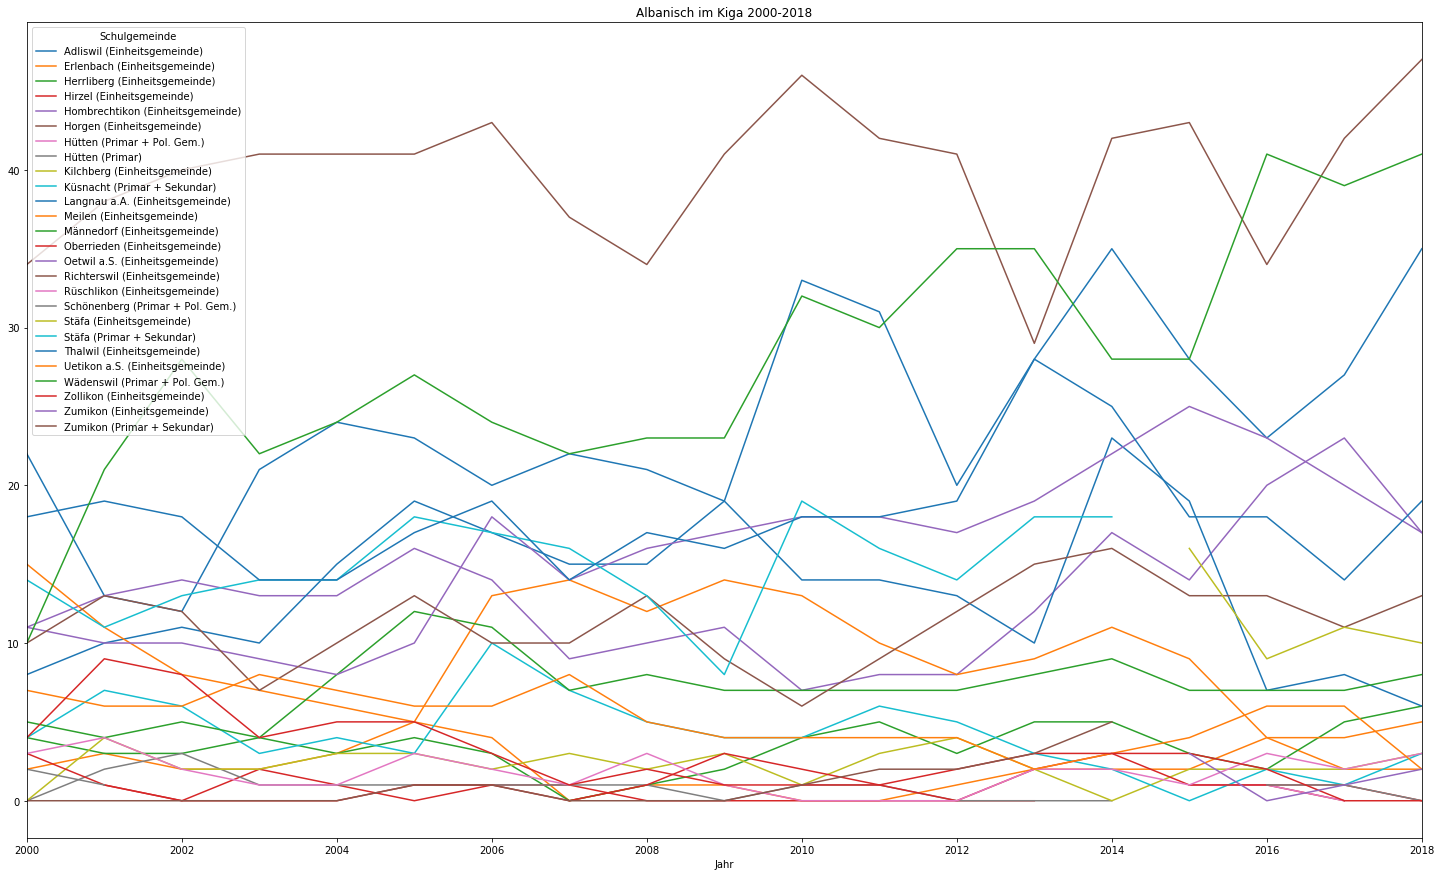

In [33]:
df_albanisch_kiga.plot(figsize=(25,15), title="Albanisch im Kiga 2000-2018")

In [34]:
#wie viele albanischsprechende Kinder gab es total in allen gemeinden im jahr 2000?
df_albanisch_see.loc[2000].sum()

1043.0

In [35]:
#wie viele 2010?
df_albanisch_see.loc[2010].sum()

1179.0

In [36]:
#wie viele 2015?
df_albanisch_see.loc[2015].sum()

1225.0

In [37]:
#und wie viele 2017?
df_albanisch_see.loc[2017].sum()

1215.0

In [38]:
#2018
df_albanisch_see.loc[2018].sum()

1227.0

Fazit: Der Anteil Kinder mit albanisch als Erstsprache nimmt in vielen Gemeinden kaum noch zu, teils sogar ab. Er hat sich stabilisiert in den letzten 5-10 Jahren.

In [39]:
#nehmen wir eine Sprache, die am Zürichsee eigentlich durch PFZ einen Boom erlebt haben sollte: Englisch

In [40]:
df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Englisch']

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2018,Adliswil (Einheitsgemeinde),Englisch,38.0,81.0,1.0,9.0,6.0,0.0,0.0,135
2018,Erlenbach (Einheitsgemeinde),Englisch,10.0,42.0,0.0,NaN,NaN,NaN,NaN,52
2018,Erlenbach-Herrliberg (Sek.schul Verband),Englisch,NaN,NaN,NaN,6.0,2.0,0.0,0.0,8
2018,Herrliberg (Einheitsgemeinde),Englisch,7.0,28.0,0.0,NaN,NaN,NaN,NaN,35
2018,Hombrechtikon (Einheitsgemeinde),Englisch,1.0,7.0,0.0,3.0,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...
2016,Uetikon a.S. (Einheitsgemeinde),Englisch,11.0,17.0,0.0,5.0,1.0,0.0,0.0,34
2016,Wädenswil (Primar + Pol. Gem.),Englisch,24.0,53.0,1.0,NaN,NaN,NaN,NaN,78
2016,Wädenswil (Sekundar),Englisch,NaN,NaN,NaN,9.0,4.0,0.0,0.0,13


In [41]:
df_englisch_see = df_zuerichsee[df_zuerichsee['Erstsprache'] == 'Englisch'].pivot_table(index='Jahr', 
                                                                                    columns='Schulgemeinde', 
                                                                                    values='Total')

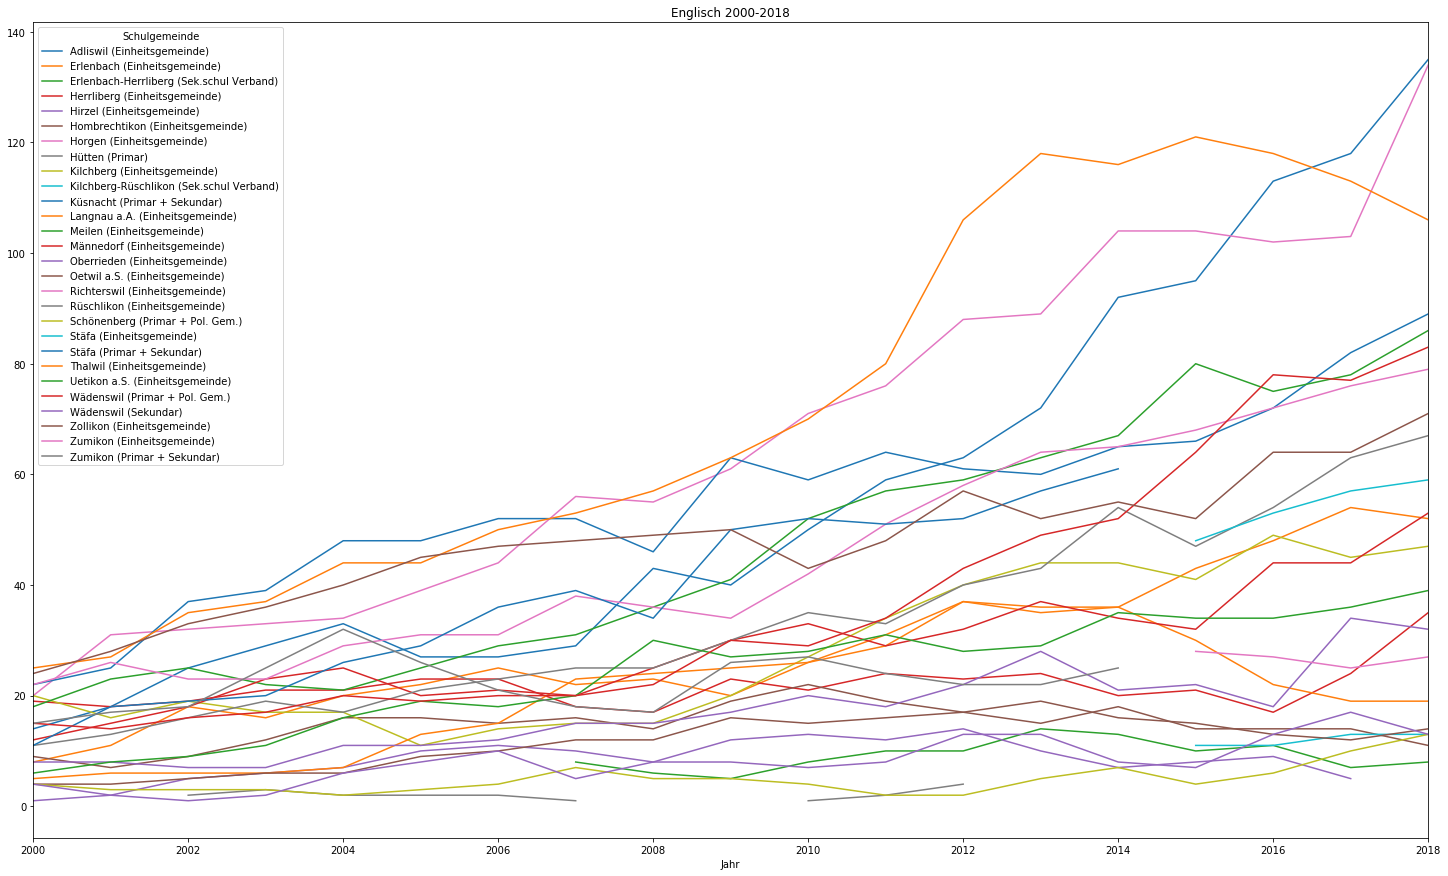

In [42]:
df_englisch_see.plot(figsize=(25,15), title="Englisch 2000-2018")

In [43]:
df_englisch_see.loc[2000].sum()

297.0

In [44]:
df_englisch_see.loc[2008].sum()

622.0

In [45]:
df_englisch_see.loc[2017].sum()

1190.0

In [46]:
df_englisch_see.loc[2018].sum()

1285.0

In [47]:
#Wie stehen die Sprachen zueinander im Verhältnis?

In [48]:
#Neues Dataframe mit dem Jahr 2000 und dem Anteil aller gesprochenen Sprachen in den Zürichseegemeinden
df_zuerichsee.loc[2000]

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2000,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2000,Adliswil (Einheitsgemeinde),Albanisch,22.0,54.0,7.0,2.0,13.0,8.0,2.0,108
2000,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2000,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,1.0,0.0,0.0,0.0,0.0,5
2000,Adliswil (Einheitsgemeinde),Bosnisch,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...
2000,Zumikon (Primar + Sekundar),Spanische Sprachen,1.0,8.0,0.0,1.0,1.0,0.0,0.0,11
2000,Zumikon (Primar + Sekundar),Südslawisch,2.0,2.0,0.0,3.0,2.0,0.0,0.0,9
2000,Zumikon (Primar + Sekundar),Türkisch,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5


In [49]:
df_zuerichsee2000 = df_zuerichsee.loc[2000]

In [50]:
df_zuerichsee2000

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2000,Adliswil (Einheitsgemeinde),Afrikanische Sprachen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2000,Adliswil (Einheitsgemeinde),Albanisch,22.0,54.0,7.0,2.0,13.0,8.0,2.0,108
2000,Adliswil (Einheitsgemeinde),Andere asiatische Sprachen,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3
2000,Adliswil (Einheitsgemeinde),Arabisch,1.0,3.0,1.0,0.0,0.0,0.0,0.0,5
2000,Adliswil (Einheitsgemeinde),Bosnisch,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...
2000,Zumikon (Primar + Sekundar),Spanische Sprachen,1.0,8.0,0.0,1.0,1.0,0.0,0.0,11
2000,Zumikon (Primar + Sekundar),Südslawisch,2.0,2.0,0.0,3.0,2.0,0.0,0.0,9
2000,Zumikon (Primar + Sekundar),Türkisch,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5


In [51]:
# Das Total der Erstsprachen im Jahr 2000 darstellen
df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False)

Erstsprache
Deutsch                           14656
Albanisch                          1043
Italienisch                         904
Südslawisch                         422
Türkisch                            370
Englisch                            297
Spanische Sprachen                  252
Portugiesisch                       243
Französisch                         227
Übrige europäische Sprachen         217
Serbisch                             97
Kroatisch                            89
Arabisch                             52
Tamil                                47
Übrige Sprachen                      47
Andere asiatische Sprachen           39
Griechisch                           36
Bosnisch                             26
Mazedonisch                          26
Nicht erhoben (nur tertiär)          26
Rätoromanisch                        25
Afrikanische Sprachen                23
Übrige ostasiatische Sprachen        18
Iranische Sprachen                   15
Übrige slawische Sprachen   

In [52]:
#Nur die 20 meistegsprochenen Sprachen
df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).head(20)

Erstsprache
Deutsch                        14656
Albanisch                       1043
Italienisch                      904
Südslawisch                      422
Türkisch                         370
Englisch                         297
Spanische Sprachen               252
Portugiesisch                    243
Französisch                      227
Übrige europäische Sprachen      217
Serbisch                          97
Kroatisch                         89
Arabisch                          52
Tamil                             47
Übrige Sprachen                   47
Andere asiatische Sprachen        39
Griechisch                        36
Bosnisch                          26
Mazedonisch                       26
Nicht erhoben (nur tertiär)       26
Name: Total, dtype: int64

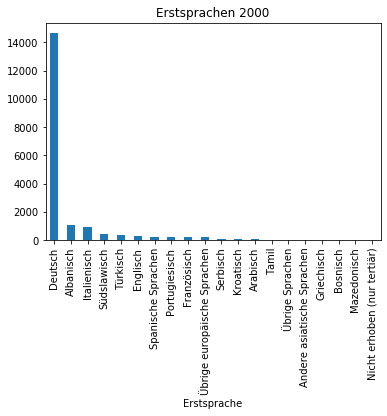

In [53]:
#in einem Balkendiagramm darstellen
df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).head(20).plot(kind='bar', 
                                                title="Erstsprachen 2000")

In [54]:
df_zuerichsee2000_new = df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False)

In [55]:
#ohne Deutsch, da es so vielsagender ist bezüglich der neuen Sprachen
df_zuerichsee2000_new.drop("Deutsch")

Erstsprache
Albanisch                         1043
Italienisch                        904
Südslawisch                        422
Türkisch                           370
Englisch                           297
Spanische Sprachen                 252
Portugiesisch                      243
Französisch                        227
Übrige europäische Sprachen        217
Serbisch                            97
Kroatisch                           89
Arabisch                            52
Tamil                               47
Übrige Sprachen                     47
Andere asiatische Sprachen          39
Griechisch                          36
Bosnisch                            26
Mazedonisch                         26
Nicht erhoben (nur tertiär)         26
Rätoromanisch                       25
Afrikanische Sprachen               23
Übrige ostasiatische Sprachen       18
Iranische Sprachen                  15
Übrige slawische Sprachen           14
Niederländisch                      14
Thai         

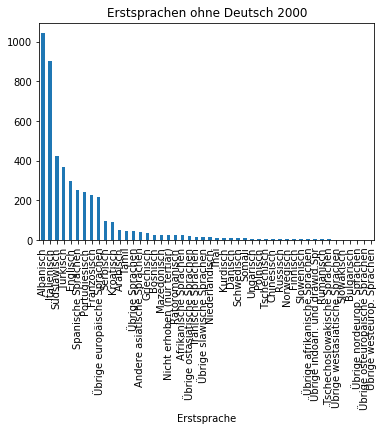

In [56]:
#plotten
df_zuerichsee2000_new.drop("Deutsch").plot(kind='bar', 
                                                title="Erstsprachen ohne Deutsch 2000")

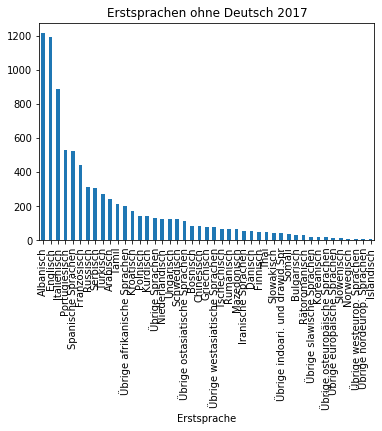

In [57]:
#und jetzt das Ganze noch für das Jahr 2017, plotten und neues Dataframe
df_zuerichsee.loc[2017]
df_zuerichsee2017 = df_zuerichsee.loc[2017]
df_zuerichsee2017.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch").plot(kind='bar', 
                                                title="Erstsprachen ohne Deutsch 2017")

In [58]:
#Weitere Dataframes für die Jahre 2005, 2010, 2015, 2018 erstellen (Zürichsee)
df_zuerichsee.loc[2005]
df_zuerichsee.loc[2010]
df_zuerichsee.loc[2015]
df_zuerichsee.loc[2018]
df_zuerichsee2005 = df_zuerichsee.loc[2005]
df_zuerichsee2010 = df_zuerichsee.loc[2010]
df_zuerichsee2015 = df_zuerichsee.loc[2015]
df_zuerichsee2018 = df_zuerichsee.loc[2018]
df_zuerichsee2005.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_zuerichsee2010.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_zuerichsee2015.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_zuerichsee2018.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2000 = df_zuerichsee2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2005 = df_zuerichsee2005.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2010 = df_zuerichsee2010.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2015 = df_zuerichsee2015.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2017 = df_zuerichsee2017.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")
df_nogerman2018 = df_zuerichsee2018.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False).drop("Deutsch")

In [59]:
#Alle Datenreihen in einem neuen Dataframe zusammenführen
df_combined = pd.DataFrame({'2000': df_nogerman2000,
                            "2005": df_nogerman2005,
                            "2010": df_nogerman2010,
                            "2015": df_nogerman2015,
                            '2017': df_nogerman2017,
                            '2018': df_nogerman2018})

In [60]:
df_combined

,2000,2005,2010,2015,2017,2018
Afrikanische Sprachen,23.0,18,3.0,NaN,NaN,NaN
Albanisch,1043.0,1196,1179.0,1225.0,1215.0,1227.0
Andere asiatische Sprachen,39.0,78,21.0,1.0,NaN,NaN
Arabisch,52.0,75,71.0,144.0,241.0,234.0
Bosnisch,26.0,58,67.0,86.0,85.0,87.0
Bulgarisch,1.0,2,9.0,26.0,30.0,35.0
Chinesisch,5.0,27,44.0,68.0,82.0,90.0
Dänisch,8.0,24,45.0,59.0,53.0,54.0
Englisch,297.0,521,781.0,1065.0,1190.0,1285.0
Finnisch,4.0,16,28.0,36.0,46.0,43.0


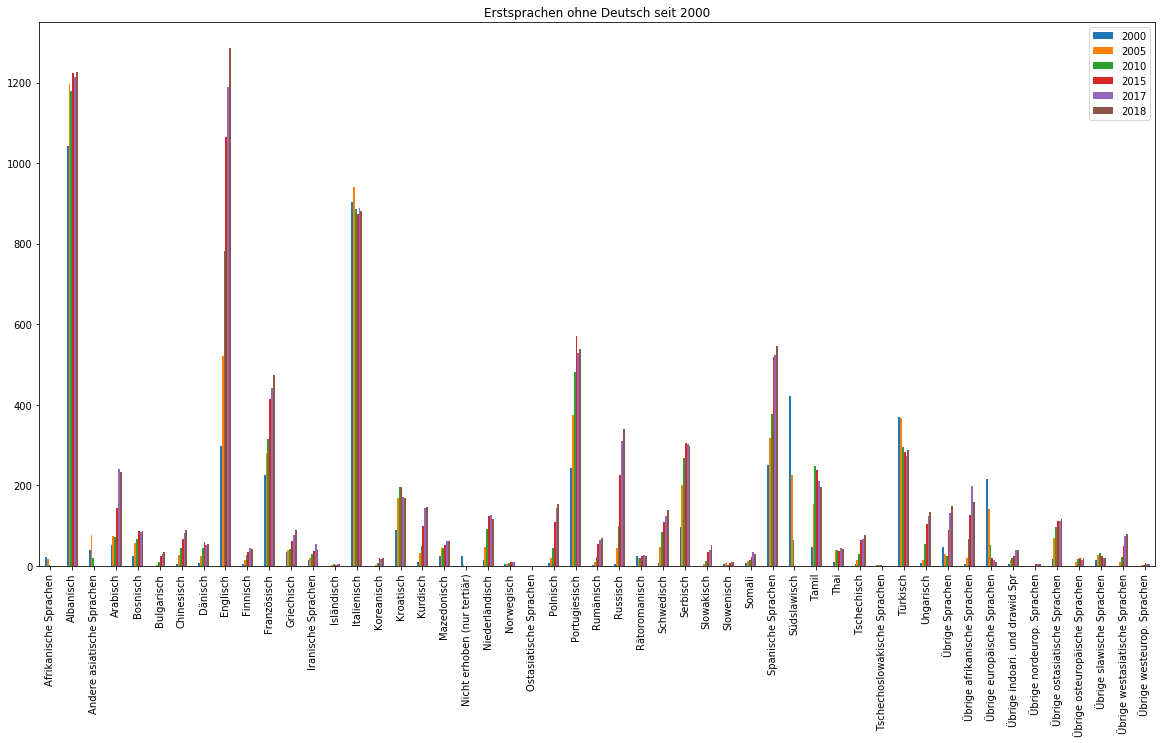

In [61]:
#Und plotten
df_combined.plot(kind='bar', figsize=(20,10), title="Erstsprachen ohne Deutsch seit 2000")

In [62]:
df_combined.drop("Nicht erhoben (nur tertiär)")
df_list_sprachen = df_combined.drop("Nicht erhoben (nur tertiär)")

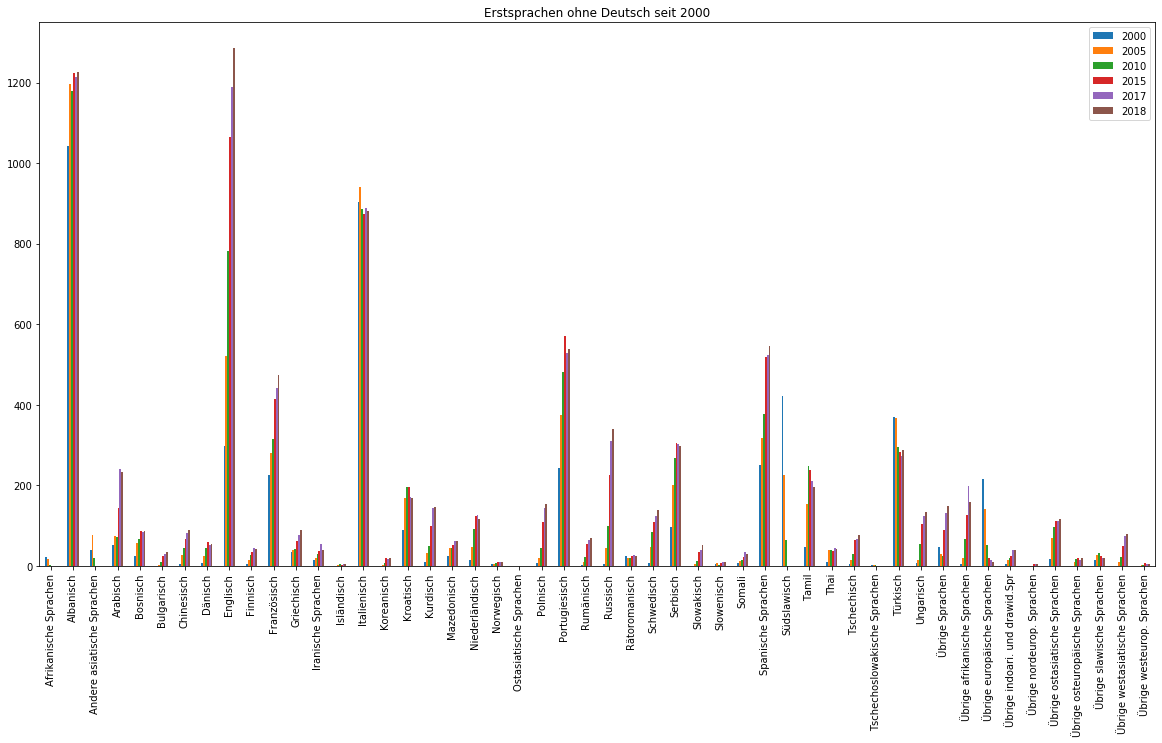

In [63]:
df_list_sprachen.plot(kind='bar', figsize=(20,10), title="Erstsprachen ohne Deutsch seit 2000")

In [64]:
#Liste etwas abspecken und die "traditionellen" und "PFZ"-Sprachen ziehen
df_list_sprachen.loc[{"Albanisch","Bosnisch","Englisch","Französisch",
                      "Italienisch","Kroatisch","Mazedonisch","Portugiesisch",
                      "Serbisch","Türkisch","Arabisch","Niederländisch","Schwedisch",
                      "Spanische Sprachen","Tamil"}]
df_condensed = df_list_sprachen.loc[{"Albanisch","Bosnisch","Englisch","Französisch",
                      "Italienisch","Kroatisch","Mazedonisch","Portugiesisch",
                      "Serbisch","Türkisch","Arabisch","Niederländisch","Schwedisch",
                      "Spanische Sprachen","Tamil"}]

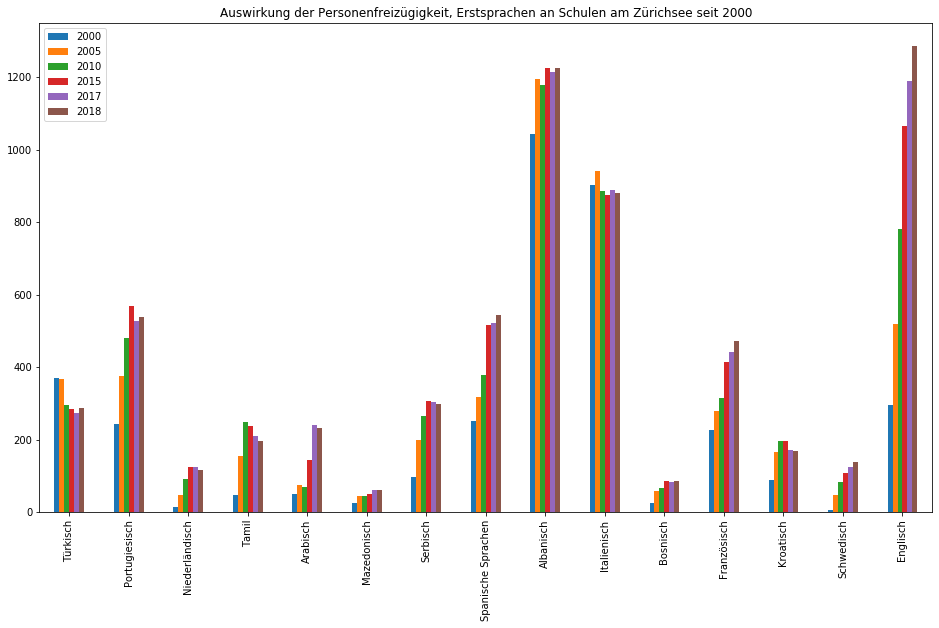

In [65]:
df_condensed.plot(kind='bar', figsize=(16,9), title="Auswirkung der Personenfreizügigkeit, Erstsprachen an Schulen am Zürichsee seit 2000")

In [66]:
path = 'Erstsprache/zuerichsee.png'

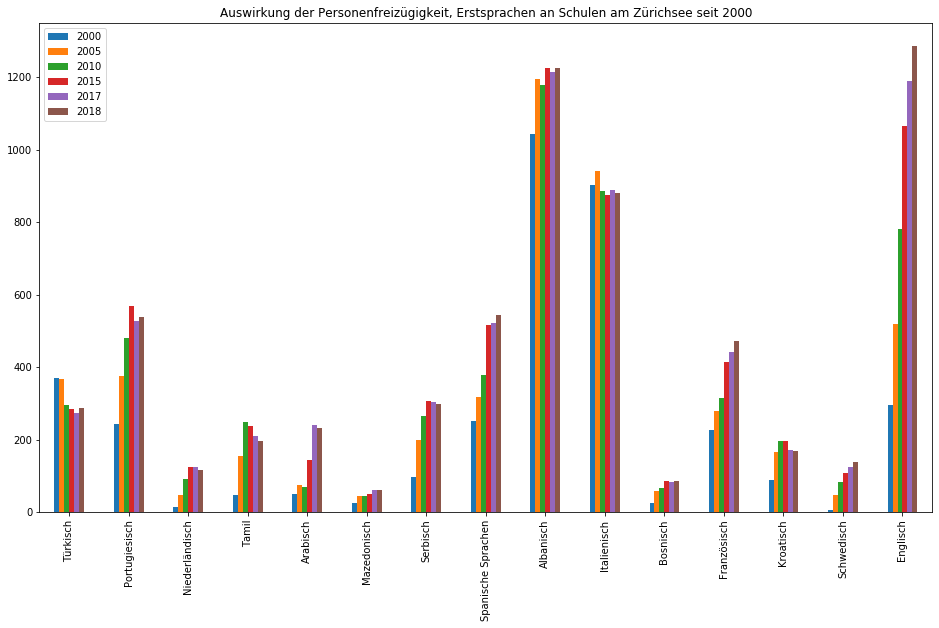

In [67]:
df_condensed.plot(kind='bar', figsize=(16,9), title="Auswirkung der Personenfreizügigkeit, Erstsprachen an Schulen am Zürichsee seit 2000").get_figure().savefig('output.png')

Fazit: Die Datenanalyse stützt die These. Die Zahl der Kinder an den Schulen am Zürichsee, die die "neuen" PFZ-Zuwanderungssprachen wie Englisch, Französisch, Niederländisch, Schwedisch oder Portugiesisch als Erstsprache sprechen, hat stark zugenommen und nimmt weiter zu.

Die traditionellen Zuwanderungssprachen (Italienisch, Bosnisch, Südslawisch, Türkisch, Tamil) nehmen ab oder stagnieren. Die Zahl der Kinder, die Albanisch und Serbisch sprechen, nahm bis vor einigen Jahren noch zu, stagniert nun aber oder ist ebenfalls rückläufig.

In [68]:
#albanisch ganzer kanton
df_all[df_all['Erstsprache'] == 'Albanisch']

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
2,2018,Adliswil (Einheitsgemeinde),Albanisch,35.0,69.0,2.0,17.0,17.0,8.0,0.0,148
63,2018,Affoltern a.A. (Primar),Albanisch,43.0,124.0,0.0,NaN,NaN,NaN,NaN,167
92,2018,Affoltern a.A.-Aeugst (Sekundar),Albanisch,NaN,NaN,NaN,16.0,21.0,9.0,1.0,47
124,2018,Andelfingen (Primar),Albanisch,6.0,8.0,0.0,NaN,NaN,NaN,NaN,14
140,2018,Andelfingen (Sekundar),Albanisch,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
79322,2016,Zürich-Limmattal (Kreisschulpflege),Albanisch,60.0,183.0,0.0,31.0,53.0,0.0,2.0,329
79361,2016,Zürich-Schwamendingen (Kreisschulpflege),Albanisch,71.0,221.0,0.0,40.0,65.0,0.0,0.0,397
79398,2016,Zürich-Uto (Kreisschulpflege),Albanisch,40.0,116.0,0.0,21.0,62.0,0.0,0.0,239
79442,2016,Zürich-Waidberg (Kreisschulpflege),Albanisch,28.0,75.0,0.0,16.0,22.0,0.0,0.0,141


In [69]:
df_all[df_all['Erstsprache'] == 'Deutsch']

,Jahr,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
0,2018,Adlikon (Primar),Deutsch,0.0,13.0,0.0,NaN,NaN,NaN,NaN,13
8,2018,Adliswil (Einheitsgemeinde),Deutsch,150.0,476.0,0.0,96.0,32.0,0.0,0.0,754
39,2018,Aesch (Primar),Deutsch,29.0,75.0,0.0,NaN,NaN,NaN,NaN,104
50,2018,Aeugst a.A. (Primar),Deutsch,37.0,92.0,0.0,NaN,NaN,NaN,NaN,129
66,2018,Affoltern a.A. (Primar),Deutsch,95.0,322.0,0.0,NaN,NaN,NaN,NaN,417
...,...,...,...,...,...,...,...,...,...,...,...
79367,2016,Zürich-Schwamendingen (Kreisschulpflege),Deutsch,272.0,708.0,0.0,91.0,55.0,0.0,0.0,1126
79404,2016,Zürich-Uto (Kreisschulpflege),Deutsch,754.0,1911.0,0.0,292.0,69.0,0.0,0.0,3026
79448,2016,Zürich-Waidberg (Kreisschulpflege),Deutsch,873.0,2259.0,0.0,347.0,59.0,0.0,2.0,3540
79493,2016,Zürich-Zürichberg (Kreisschulpflege),Deutsch,621.0,1871.0,0.0,357.0,25.0,0.0,3.0,2877


In [70]:
df_all[df_all['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')
df_alban_kanton = df_all[df_all['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')

In [71]:
df_all[df_all['Erstsprache'] == 'Deutsch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')
df_deutsch_kanton = df_all[df_all['Erstsprache'] == 'Deutsch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='Total')

In [72]:
df_all[df_all['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='KG')
df_alban_kanton_kg = df_all[df_all['Erstsprache'] == 'Albanisch'].pivot_table(index='Jahr', 
                                                                       columns='Schulgemeinde', 
                                                                       values='KG')

In [73]:
df_alban_kanton

Schulgemeinde,Adliswil (Einheitsgemeinde),Affoltern a.A. (Primar),Affoltern a.A.-Aeugst (Sekundar),Andelfingen (Primar),Andelfingen (Sekundar),Bachenbülach (Primar),Bachs (Primar),Bassersdorf (Einheitsgemeinde),Bauma (Einheitsgemeinde),Bauma-Sternenberg (Einheitsgemeinde),...,Zollikon (Einheitsgemeinde),Zumikon (Einheitsgemeinde),Zumikon (Primar + Sekundar),Zürich-Glattal (Kreisschulpflege),Zürich-Letzi (Kreisschulpflege),Zürich-Limmattal (Kreisschulpflege),Zürich-Schwamendingen (Kreisschulpflege),Zürich-Uto (Kreisschulpflege),Zürich-Waidberg (Kreisschulpflege),Zürich-Zürichberg (Kreisschulpflege)
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,108.0,137.0,23.0,7.0,6.0,15.0,2.0,38.0,52.0,NaN,...,17.0,NaN,11.0,425.0,288.0,678.0,204.0,248.0,154.0,74.0
2001,104.0,119.0,20.0,6.0,8.0,16.0,NaN,47.0,56.0,NaN,...,22.0,NaN,5.0,426.0,291.0,655.0,229.0,263.0,158.0,66.0
2002,103.0,121.0,25.0,7.0,7.0,14.0,1.0,61.0,53.0,NaN,...,23.0,NaN,5.0,432.0,298.0,640.0,260.0,272.0,173.0,65.0
2003,112.0,117.0,37.0,6.0,9.0,22.0,2.0,63.0,54.0,NaN,...,21.0,NaN,5.0,447.0,300.0,628.0,301.0,303.0,169.0,59.0
2004,128.0,111.0,42.0,6.0,7.0,22.0,NaN,67.0,52.0,NaN,...,24.0,NaN,4.0,468.0,314.0,574.0,335.0,332.0,176.0,56.0
2005,127.0,109.0,57.0,2.0,6.0,30.0,NaN,72.0,50.0,NaN,...,27.0,NaN,5.0,495.0,333.0,557.0,369.0,324.0,169.0,53.0
2006,128.0,122.0,61.0,3.0,4.0,39.0,NaN,87.0,43.0,NaN,...,26.0,NaN,3.0,515.0,337.0,539.0,376.0,325.0,164.0,47.0
2007,128.0,119.0,67.0,5.0,4.0,42.0,NaN,87.0,40.0,NaN,...,15.0,NaN,3.0,532.0,346.0,500.0,400.0,317.0,160.0,46.0
2008,126.0,120.0,61.0,3.0,5.0,46.0,NaN,83.0,40.0,NaN,...,15.0,NaN,1.0,551.0,341.0,477.0,411.0,291.0,168.0,45.0


In [74]:
df_alban_kanton_kg

Schulgemeinde,Adliswil (Einheitsgemeinde),Affoltern a.A. (Primar),Andelfingen (Primar),Bachenbülach (Primar),Bachs (Primar),Bassersdorf (Einheitsgemeinde),Bauma (Einheitsgemeinde),Bauma-Sternenberg (Einheitsgemeinde),Benken (Primar),Berg a.I. (Primar),...,Zollikon (Einheitsgemeinde),Zumikon (Einheitsgemeinde),Zumikon (Primar + Sekundar),Zürich-Glattal (Kreisschulpflege),Zürich-Letzi (Kreisschulpflege),Zürich-Limmattal (Kreisschulpflege),Zürich-Schwamendingen (Kreisschulpflege),Zürich-Uto (Kreisschulpflege),Zürich-Waidberg (Kreisschulpflege),Zürich-Zürichberg (Kreisschulpflege)
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,22.0,38.0,1.0,3.0,1.0,4.0,9.0,NaN,0.0,1.0,...,4.0,NaN,0.0,89.0,61.0,105.0,49.0,44.0,26.0,7.0
2001,13.0,24.0,1.0,5.0,NaN,7.0,9.0,NaN,0.0,1.0,...,9.0,NaN,0.0,77.0,52.0,93.0,45.0,58.0,31.0,12.0
2002,12.0,18.0,2.0,6.0,1.0,8.0,8.0,NaN,2.0,1.0,...,8.0,NaN,0.0,77.0,52.0,97.0,58.0,54.0,33.0,15.0
2003,21.0,23.0,0.0,12.0,1.0,7.0,7.0,NaN,2.0,1.0,...,4.0,NaN,0.0,80.0,55.0,117.0,76.0,53.0,29.0,11.0
2004,24.0,29.0,0.0,10.0,NaN,11.0,7.0,NaN,1.0,1.0,...,5.0,NaN,0.0,95.0,64.0,105.0,74.0,59.0,35.0,9.0
2005,23.0,25.0,0.0,12.0,NaN,16.0,8.0,NaN,1.0,2.0,...,5.0,NaN,1.0,116.0,79.0,91.0,69.0,50.0,40.0,8.0
2006,20.0,27.0,1.0,16.0,NaN,19.0,8.0,NaN,1.0,1.0,...,3.0,NaN,1.0,124.0,71.0,89.0,72.0,55.0,39.0,5.0
2007,22.0,32.0,1.0,15.0,NaN,16.0,4.0,NaN,0.0,0.0,...,1.0,NaN,0.0,116.0,74.0,76.0,77.0,51.0,31.0,6.0
2008,21.0,34.0,1.0,15.0,NaN,14.0,7.0,NaN,0.0,NaN,...,2.0,NaN,0.0,108.0,79.0,80.0,73.0,40.0,29.0,7.0


In [75]:
df_deutsch_kanton

Schulgemeinde,Adlikon (Primar),Adliswil (Einheitsgemeinde),Aesch (Primar),Aeugst a.A. (Primar),Affoltern a.A. (Primar),Affoltern a.A.-Aeugst (Sekundar),Altikon (Primar + Pol. Gem.),Andelfingen (Primar),Andelfingen (Sekundar),Bachenbülach (Primar),...,Zollikon (Einheitsgemeinde),Zumikon (Einheitsgemeinde),Zumikon (Primar + Sekundar),Zürich-Glattal (Kreisschulpflege),Zürich-Letzi (Kreisschulpflege),Zürich-Limmattal (Kreisschulpflege),Zürich-Schwamendingen (Kreisschulpflege),Zürich-Uto (Kreisschulpflege),Zürich-Waidberg (Kreisschulpflege),Zürich-Zürichberg (Kreisschulpflege)
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,9.0,985.0,69.0,147.0,685.0,263.0,64.0,158.0,242.0,148.0,...,627.0,NaN,305.0,2563.0,1741.0,758.0,759.5,2454.0,2467.0,2159.0
2001,13.0,1004.0,72.0,152.0,683.0,239.0,67.0,154.0,241.0,166.0,...,617.0,NaN,300.0,2419.0,1676.0,734.0,730.0,2368.0,2454.0,2117.0
2002,15.0,974.0,65.0,147.0,682.0,225.0,65.0,152.0,253.0,170.0,...,600.0,NaN,281.0,2325.0,1613.0,752.0,1405.0,2338.0,2492.0,2139.0
2003,12.0,924.0,71.0,139.0,686.0,223.0,60.0,157.0,236.0,174.0,...,605.0,NaN,290.0,2233.0,1503.0,699.0,1320.0,2291.0,2525.0,1050.0
2004,15.0,886.0,72.0,138.0,328.5,222.0,65.0,80.0,246.0,176.0,...,590.0,NaN,273.0,1065.5,1420.0,643.0,1204.0,2266.0,2492.0,1066.0
2005,11.0,819.0,73.0,133.0,630.0,229.0,61.0,82.5,236.0,169.0,...,608.0,NaN,274.0,1040.5,1332.0,602.0,1073.0,2228.0,2462.0,1067.0
2006,12.0,820.0,75.0,130.0,604.0,241.0,58.0,77.0,248.0,178.0,...,610.0,NaN,254.0,1020.5,1265.0,568.0,941.0,2185.0,1227.5,1022.0
2007,13.0,391.0,79.0,127.0,576.0,240.0,48.0,304.0,237.0,170.0,...,645.0,NaN,237.0,1020.5,1212.0,568.0,439.5,1062.0,1224.0,1015.0
2008,12.0,774.0,79.0,125.0,533.0,237.0,46.0,301.0,236.0,170.0,...,677.0,NaN,220.0,1000.0,1211.0,573.0,433.0,2109.0,1204.5,2043.0


In [76]:
df_alban_kanton.sum(axis = 1, skipna = True)
df_alban_zh = df_alban_kanton.sum(axis = 1, skipna = True)

In [77]:
df_alban_kanton_kg.sum(axis = 1, skipna = True)
df_alban_zh_kg = df_alban_kanton_kg.sum(axis = 1, skipna = True)

In [78]:
df_deutsch_kanton.sum(axis = 1, skipna = True)
df_german_kanton = df_deutsch_kanton.sum(axis = 1, skipna = True)

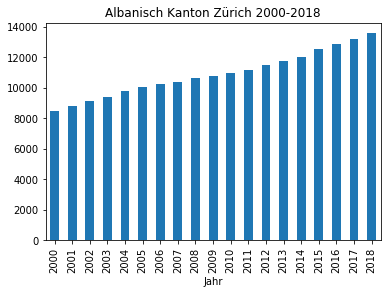

In [79]:
df_alban_zh.plot(kind='bar', title='Albanisch Kanton Zürich 2000-2018')

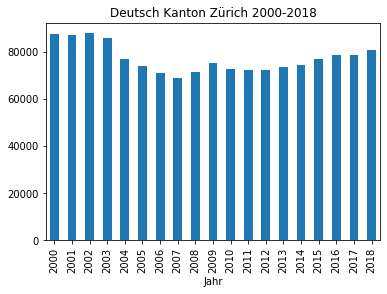

In [80]:
df_german_kanton.plot(kind='bar', title='Deutsch Kanton Zürich 2000-2018')

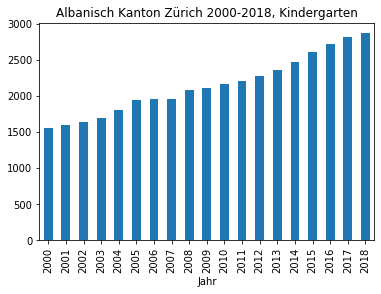

In [81]:
df_alban_zh_kg.plot(kind='bar', title='Albanisch Kanton Zürich 2000-2018, Kindergarten')

In [82]:
df_alban_dietikon.sum(axis = 1, skipna = True)
df_alban_dietikonsum = df_alban_dietikon.sum(axis = 1, skipna = True)

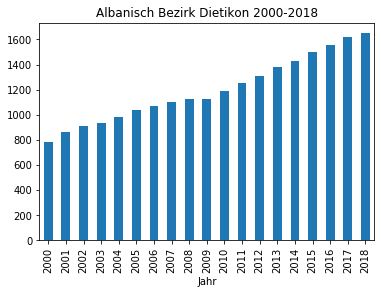

In [83]:
df_alban_dietikonsum.plot(kind='bar', title='Albanisch Bezirk Dietikon 2000-2018')

In [84]:
df_albanisch_see.sum(axis = 1, skipna = True)
df_albanisch_zürisee = df_albanisch_see.sum(axis = 1, skipna = True)

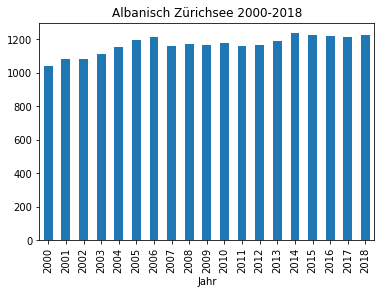

In [85]:
df_albanisch_zürisee.plot(kind='bar', title='Albanisch Zürichsee 2000-2018')

In [86]:
df_alban_stadtzüri.sum(axis = 1, skipna = True)
df_alban_stadtzürich = df_alban_stadtzüri.sum(axis = 1, skipna = True)

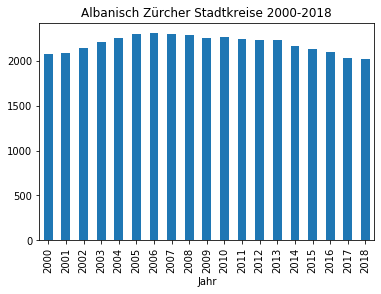

In [87]:
df_alban_stadtzürich.plot(kind='bar', title='Albanisch Zürcher Stadtkreise 2000-2018')

In [88]:
df_stadtzürich

,Schulgemeinde,Erstsprache,KG,PS,PS Sonder,Sek A,Sek B,Sek C,Sek Sonder,Total
Jahr,,,,,,,,,,
2018,Zürich-Glattal (Kreisschulpflege),Albanisch,121.0,315.0,1.0,65.0,78.0,0.0,0.0,580
2018,Zürich-Glattal (Kreisschulpflege),Arabisch,71.0,103.0,11.0,32.0,36.0,0.0,5.0,258
2018,Zürich-Glattal (Kreisschulpflege),Bosnisch,23.0,40.0,0.0,16.0,10.0,0.0,0.0,89
2018,Zürich-Glattal (Kreisschulpflege),Bulgarisch,3.0,8.0,0.0,1.0,0.0,0.0,0.0,12
2018,Zürich-Glattal (Kreisschulpflege),Chinesisch,16.0,26.0,1.0,5.0,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...
2016,Zürich-Zürichberg (Kreisschulpflege),Übrige osteuropäische Sprachen,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3
2016,Zürich-Zürichberg (Kreisschulpflege),Übrige slawische Sprachen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2
2016,Zürich-Zürichberg (Kreisschulpflege),Übrige Sprachen,1.0,12.0,0.0,1.0,3.0,0.0,1.0,18


In [89]:
df_stadtzürich.loc[2000]
df_stadtzh2000 = df_stadtzürich.loc[2000]

In [90]:
df_stadtzh2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False)
df_stadtzh2000_new = df_stadtzh2000.groupby('Erstsprache')['Total'].sum().sort_values(ascending=False)

In [91]:
df_stadtzh2000_new.drop("Deutsch")
df_stadtzh2000_nogerman = df_stadtzh2000_new.drop("Deutsch")

In [92]:
df_stadtzh2000_nogerman

Erstsprache
Albanisch                         2071
Italienisch                       1586
Spanische Sprachen                1237
Südslawisch                       1222
Türkisch                          1206
Portugiesisch                     1157
Serbisch                           535
Übrige europäische Sprachen        500
Tamil                              398
Französisch                        341
Englisch                           318
Arabisch                           309
Kroatisch                          191
Afrikanische Sprachen              180
Griechisch                         167
Bosnisch                           145
Übrige Sprachen                    137
Mazedonisch                         60
Andere asiatische Sprachen          60
Rätoromanisch                       42
Übrige ostasiatische Sprachen       36
Thai                                33
Polnisch                            33
Russisch                            32
Übrige slawische Sprachen           29
Iranische Spr